In [75]:
def irange(start, stop, step=1):            # This is an inclusive range function, so that I don't have to remember
    if step == 1:                           # that range() leaves out the last value. 
        return range(start, stop+1)         #
    elif step < 0:                          #
        return range(start, stop-1, step)   #
    else:                                   #
        return range(start, stop+1, step)   #

def indeces(somelist):                   #returns a list of numbers from 0 to len(somelist), so I can easily iterate
    return range(len(somelist))          # with reference to the index of each element in the list


In [31]:
import matplotlib.pyplot as plt          # this is the
                                         # plot library
    
import numpy as np                       # not strictly necessary
                                         # but useful
    
import scipy.special                     # imported for use with intergration in problem 7
                                         #
import scipy                             #
    
%matplotlib inline                       
                                         # displays plots in the notebook
                                         # instead of popup windows
import math

class point(): 
    def __init__(self, xcoord, ycoord):  #this defines the basic attributes of a point- its coordinates. 
        self.x=xcoord
        self.y=ycoord
    def __repr__(self): #tells how to print() a point
        return str((self.x,self.y))
    def __add__(self, other): #adds corresponding coordinates
        return point(self.x+other.x, self.y+other.y)
    def __sub__(self, other): #subtracts corresponding coordinates
        return point(self.x-other.x, self.y-other.y)
    def __mul__(self, other): #defines scalar multiplication
        if isinstance(other, point):
            return self.x*other.x+self.y*other.y
        else:
            return point(float(self.x)*other, float(self.y)*other)
    def __rmul__(self, other): #identical definition as above
        if isinstance(other, point):
            return self.x*other.x+self.y*other.y
        else:
            return point(float(self.x)*other, float(self.y)*other)
    def __eq__(self, other): #returns True if coordinates are equal
        if not isinstance(other, point):
            return False
        if self.x==other.x and self.y==other.y: return True
        else: return False
    def __ne__(self, other): #returns False if coordinates are equal
        return not self==other
    def dot(self, other):
        return self.x*other.x+self.y*other.y
    def length(self):
        return math.sqrt(self.dot(self))
    def verticalReflect(self,y): #vertical reflection, returns a point on the opposite side of a horizontal line
        new_y = self.y+2*(y-self.y)
        return point(self.x,new_y)
    def horizontalReflect(self,x): #vertical reflection, returns a point on the opposite side of a horizontal line
        new_x = self.x+2*(x-self.x)
        return point(new_x, self.y)
    def translate(self, x, y): #adds a vector (via the parameters, x and y) to a point's coordinates
        return point(self.x+x, self.y+y)
    def display(self, label="", labeloffset=.05, c="red", fontsize=12): #plots the point
        plt.scatter(self.x, self.y, marker="o", c=c);
        plt.annotate(s=label, xy=(self.x+labeloffset, self.y+labeloffset), fontsize=fontsize);
        plt.axes().set_aspect("equal");
        return plt.axis();
    
#this class has methods which are analogous to the methods for the point() class. In fact, many of the definitions
# here use those functions.  
class triangle():
    def __init__(self, vertex_1, vertex_2, vertex_3):
        if not isinstance(vertex_1, point) or not isinstance(vertex_2, point) or not isinstance(vertex_3, point):
            print "Error, verteces must be points"
            return None
        self.v1 = vertex_1; self.v2 = vertex_2; self.v3 = vertex_3
    def __repr__(self):
        return str(self.v1)+", "+str(self.v2)+", "+str(self.v3)
    def translate(self,x,y):
        return triangle(self.v1.translate(x,y), self.v2.translate(x,y), self.v3.translate(x,y))
    def horizontalReflect(self,x):
        return triangle(self.v1.horizontalReflect(x), self.v2.horizontalReflect(x), self.v3.horizontalReflect(x))
    def verticalReflect(self,y):
        return triangle(self.v1.verticalReflect(y), self.v2.verticalReflect(y), self.v3.verticalReflect(y))
    def display(self, vertices="True", label="", labeloffset=-.1, m="o", c="red", fontsize=12, ls="--"):
        if vertices == True:
            #plots the vertices
            x = [self.v1.x, self.v2.x, self.v3.x]
            y = [self.v1.y, self.v2.y, self.v3.y]
            plt.scatter(x, y, marker=m, c=c)
        #plots all 3 edges
        plt.plot([self.v1.x, self.v2.x, self.v3.x, self.v1.x],             
                 [self.v1.y, self.v2.y, self.v3.y, self.v1.y], ls=ls, c=c) 
        if label != "":
            #sets the label location to be the centroid of the triangle
            labelx = np.mean([self.v1.x, self.v2.x, self.v3.x])
            labely = np.mean([self.v1.y, self.v2.y, self.v3.y])
            #annotates the triangle label
            plt.annotate(s=label, xy=(labelx+labeloffset,labely+labeloffset), fontsize=fontsize)
            plt.axes().set_aspect("equal");
        
        

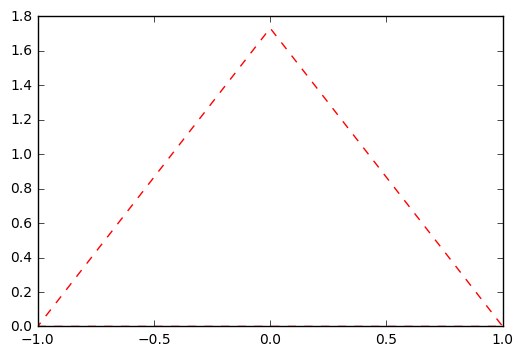

In [51]:
A=point(-1,0); B=point(1,0); C=point(0,np.sqrt(3))

T_0=triangle(A, B, C)
T_0.display()

In [52]:
import math

#def dotproduct(v1, v2):
    #return sum((a*b) for a, b in zip(v1, v2))

def length(v, u=""):
    if u=="":
        return math.sqrt(v*v)
    else:
        v=v-u
        return math.sqrt(v*v)

def angle(v1, v2):
    return math.acos(v1*v2) / (length(v1) * length(v2))

In [59]:
def proj(p,a, b=""): #projection of point u in segment v
    if b=='':
        u=p
        v=a
    else:
        u=p-a
        v=b-a
    
    return a+((u*v)/(v*v))*v

#(vu.dot(v)/length(v)**2)*v+v1

In [79]:
def talts(A,B,C):
    plt.plot([A.x, B.x, C.x, A.x],[A.y, B.y, C.y, A.y], c='black')
    #A.display()
    #B.display()
    #C.display()
    P=[]
    plt.axes().set_aspect("equal")

    P.append(proj(B, C,A))
    #P[0].display()
    plt.plot([B.x,P[0].x], [B.y,P[0].y], color='black')

    P.append(proj(P[0], B,A))
    #P[1].display()
    plt.plot([P[0].x,P[1].x], [P[0].y,P[1].y], color='black')

    P.append(proj(P[1], P[0],A))
    #P[2].display()
    plt.plot([P[1].x,P[2].x], [P[1].y,P[2].y], color='black')

    for n in irange(3,13):
        P.append(proj(P[n-1], P[n-2],A))
        #P[n].display()
        plt.plot([P[n-1].x,P[n].x], [P[n-1].y,P[n].y], color='black')


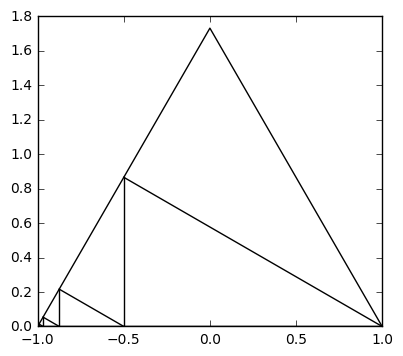

In [80]:
talts(A,B,C)